In [19]:
import pandas as pd

# Load CSV file
df = pd.read_csv("HR_Employee_Attrition.csv")

# Display first 5 rows
df.head()

,Age,Department,JobRole,MonthlyIncome,OverTime,JobSatisfaction,Attrition
0,34,Sales,Sales Executive,5000,Yes,3,Yes
1,28,HR,HR Executive,4200,No,4,No
2,45,IT,Developer,6200,Yes,2,No
3,36,Finance,Accountant,5800,No,3,No
4,30,Sales,Sales Executive,4900,Yes,3,Yes


In [20]:
# Check rows and columns
print("Dataset Shape:", df.shape)

# Show column names
print("Column Names:", df.columns.tolist())

# Detailed info
df.info()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Dataset Shape: (5, 7)
Column Names: ['Age', 'Department', 'JobRole', 'MonthlyIncome', 'OverTime', 'JobSatisfaction', 'Attrition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              5 non-null      int64 
 1   Department       5 non-null      object
 2   JobRole          5 non-null      object
 3   MonthlyIncome    5 non-null      int64 
 4   OverTime         5 non-null      object
 5   JobSatisfaction  5 non-null      int64 
 6   Attrition        5 non-null      object
dtypes: int64(3), object(4)
memory usage: 412.0+ bytes
Missing values:
 Age                0
Department         0
JobRole            0
MonthlyIncome      0
OverTime           0
JobSatisfaction    0
Attrition          0
dtype: int64


In [21]:
# Attrition count
print("Attrition Value Counts:")
print(df['Attrition'].value_counts())

Attrition Value Counts:
Attrition
No     3
Yes    2
Name: count, dtype: int64


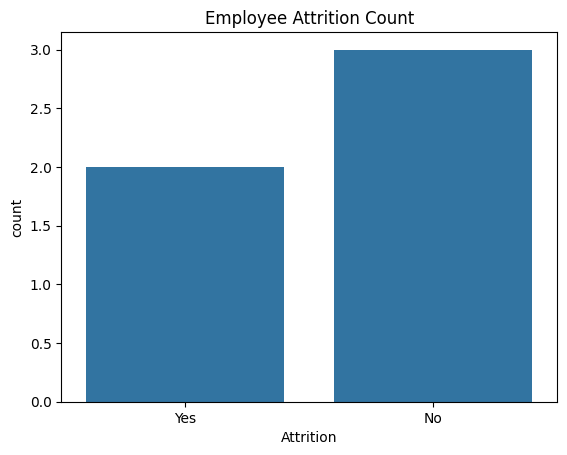

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()


In [23]:
# Table form
pd.crosstab(df['Department'], df['Attrition'])

Attrition,No,Yes
Department,,
Finance,1,0
HR,1,0
IT,1,0
Sales,0,2


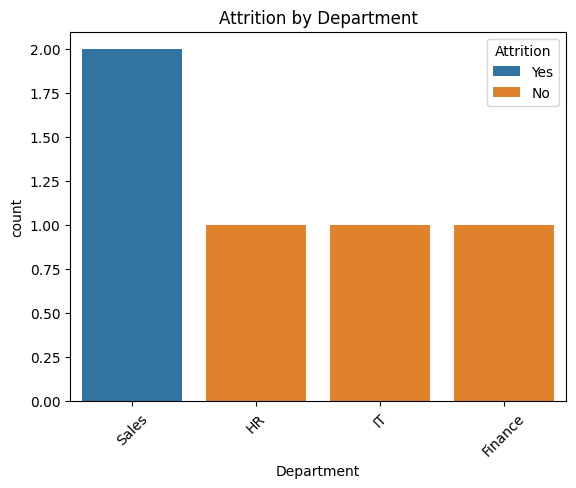

In [24]:
# Chart form
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

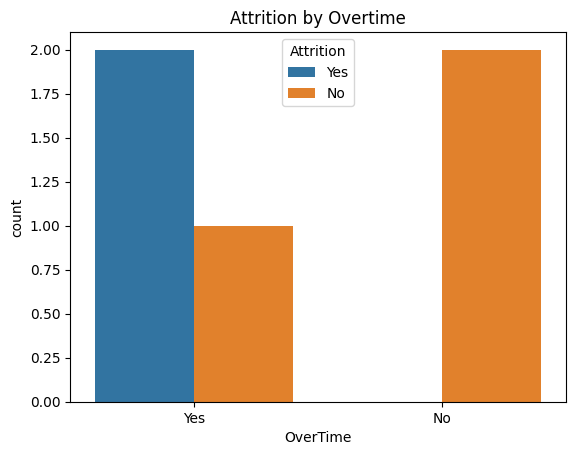

In [25]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by Overtime")
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
df_model = df.copy()

# Apply Label Encoding to all object (categorical) columns
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

# Check converted DataFrame
df_model.head()

,Age,Department,JobRole,MonthlyIncome,OverTime,JobSatisfaction,Attrition
0,34,3,3,5000,1,3,1
1,28,1,2,4200,0,4,0
2,45,2,1,6200,1,2,0
3,36,0,0,5800,0,3,0
4,30,3,3,4900,1,3,1


In [27]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Confusion Matrix:
 [[0 1]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

In [29]:
!pip install shap

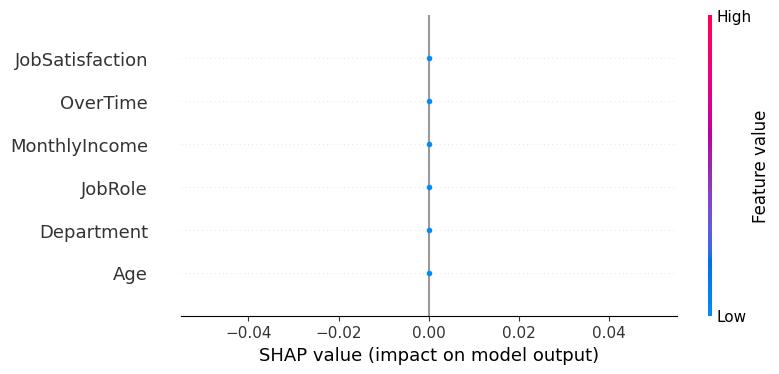

In [30]:
import shap

# Initialize explainer
explainer = shap.Explainer(model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.plots.beeswarm(shap_values)

In [31]:
final_df = df.copy()

# Predict using trained model
final_df['Prediction'] = model.predict(X)

# Optional: map 1/0 to Yes/No
final_df['Prediction'] = final_df['Prediction'].map({1: 'Yes', 0: 'No'})

# Export CSV
final_df.to_csv('HR_Attrition_Predictions.csv', index=False)